In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
data_dir = "/content/drive/MyDrive/Transfer  Learning/Lab/Exp-1/Dataset/Chessman-image-dataset/Chess"


In [ ]:
image_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


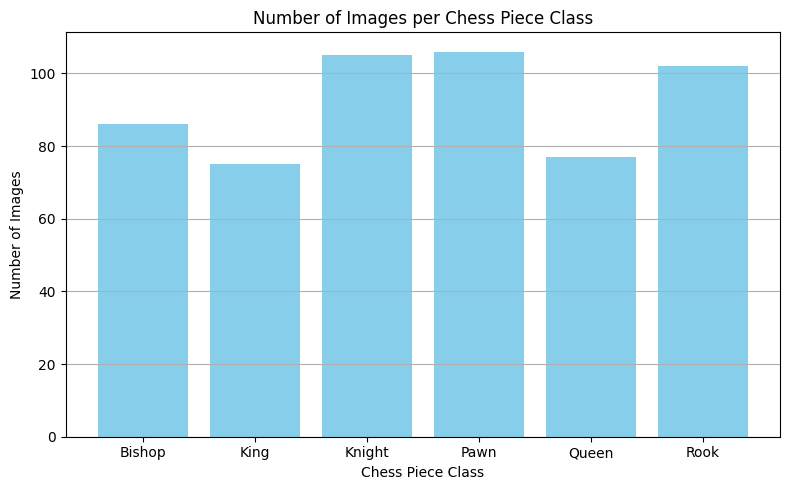

In [ ]:
class_counts = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        count = len([file for file in os.listdir(class_path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = count

# Plot
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Number of Images per Chess Piece Class')
plt.xlabel('Chess Piece Class')
plt.ylabel('Number of Images')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,974 (2.61 MB)

 Trainable params: 683,974 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layer in model.layers:
    print(f"{layer.name:20s} | Input shape: {layer.input_shape} | Output shape: {layer.output_shape}")


AttributeError: 'Conv2D' object has no attribute 'input_shape'

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 963ms/step - accuracy: 0.1700 - loss: 1.8443 - val_accuracy: 0.2018 - val_loss: 1.7730
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 919ms/step - accuracy: 0.2173 - loss: 1.7567 - val_accuracy: 0.2569 - val_loss: 1.7860
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 897ms/step - accuracy: 0.3117 - loss: 1.6768 - val_accuracy: 0.2110 - val_loss: 1.7783
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 739ms/step - accuracy: 0.3664 - loss: 1.6171 - val_accuracy: 0.2569 - val_loss: 1.7178
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 883ms/step - accuracy: 0.4067 - loss: 1.4057 - val_accuracy: 0.3394 - val_loss: 1.6838
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 879ms/step - accuracy: 0.4927 - loss: 1.2762 - val_accuracy: 0.3028 - val_loss: 1.6921
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 890ms/step - accuracy: 0.5232 - loss: 1.3238 - val_accuracy: 0.3853 - val_loss: 1.6531
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 740ms/step - accuracy: 0.6029 - loss: 1.0413 - val_accu

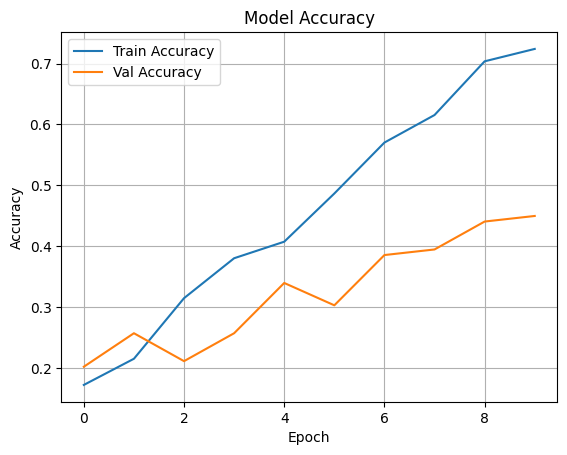

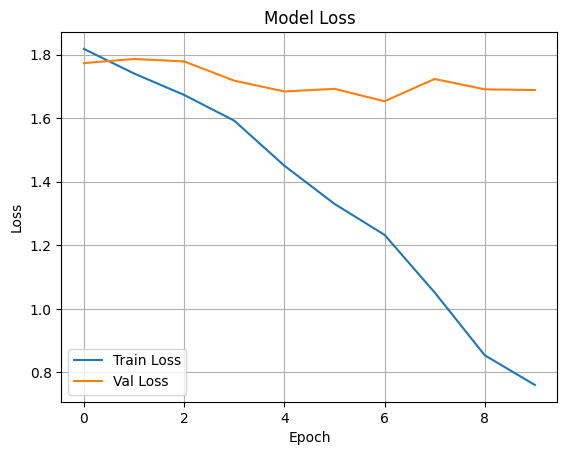

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


img_path = '/content/drive/MyDrive/Transfer  Learning/Lab/Exp-1/Dataset/Chessman-image-dataset/Chess/Knight/00000002.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)


class_labels = list(train_data.class_indices.keys())
print("Predicted Class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Predicted Class: Knight


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:

val_data.reset()

y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)


y_true = val_data.classes


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 679ms/step


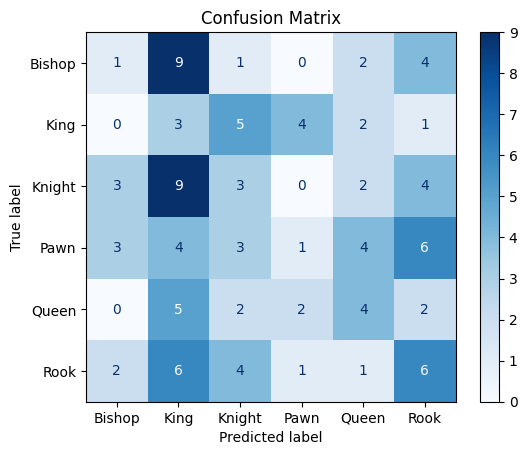

In [ ]:

class_labels = list(val_data.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
